In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../dataset/processed/cleaned_train.csv")

print("✅ Dataset loaded successfully!")
print(f"Initial shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

✅ Dataset loaded successfully!
Initial shape: 75000 rows × 10 columns



In [18]:
df = df.dropna(subset=["item_name"])
print(f"After removing missing item_name: {df.shape[0]} rows\n")

After removing missing item_name: 74992 rows



In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.15)
    Q3 = data[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before = len(data)
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    after = len(data)
    print(f"{column}: Removed {before - after} outliers ({(before - after)/before*100:.2f}%)")
    return data

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

print(f"\nAfter outlier removal: {df.shape[0]} rows remain.\n")

sample_id: Removed 0 outliers (0.00%)
price: Removed 1177 outliers (1.57%)
value: Removed 2569 outliers (3.48%)

After outlier removal: 71246 rows remain.



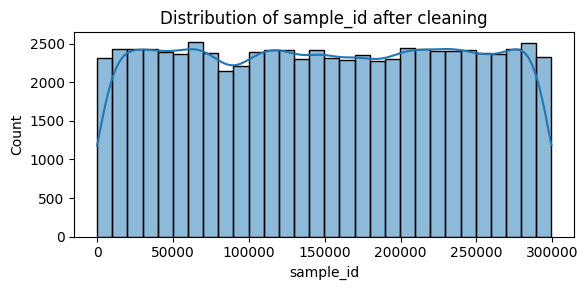

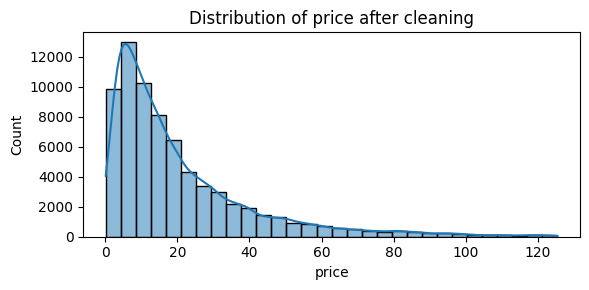

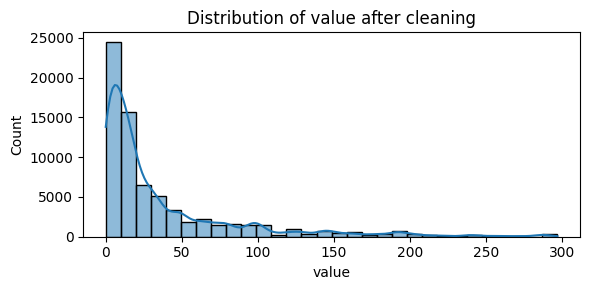

In [20]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} after cleaning")
    plt.tight_layout()
    plt.show()


In [13]:
output_path = "../dataset/processed/final_cleaned_dataset.csv"
df.to_csv(output_path, index=False)

print(f"✅ Data cleaning complete. Saved to {output_path}")

✅ Data cleaning complete. Saved to ../dataset/processed/final_cleaned_dataset.csv
